# Wordle
Datasets: 
- English: http://www.lexique.org/databases/SUBTLEX-US/SUBTLEXus74286wordstextversion.tsv" 
- French: http://www.lexique.org/databases/Lexique382/Lexique382.tsv" 
- Nerdle: cf notebook
- wordle: Wordle source code

In [1]:
from wordle_core import *

In [2]:
# source = "wordle"
# source = "english"
# source = "french"
source = "nerdle"

word_list = load_words(source)

In [3]:
true_word = "pizza"
true_word = "7*0/35=0"
w = Wordle(true_word)
s = Solver(word_list)
s.solve(w)

print(f"Solution found in {s.tries} attempts!")

/home/disc/p.templier/Documents/Doctorat/Dev/Solvers/Wordle/wordle_core.py:113: RuntimeWarning: invalid value encountered in true_divide
  self.probas = count / (np.sum(count)/5)


(1) 67*0+0=0 -> ❌❔❔❔❌❔✅✅
(2) 0*87/7=0 -> ❔✅❌❔❔❔✅✅
(3) 7*0/75=0 -> ✅✅✅✅❔✅✅✅
(4) 7*0/35=0 -> ✅✅✅✅✅✅✅✅
Solution found in 4 attempts!


In [5]:
s = Solver(word_list, size=8)
w = s.ask()

'1*79*0=0'

In [11]:
s = Solver(word_list, size=8)
while True:
    w = s.ask()
    res = input(w)
    s.tell(w, list(res))
    if "0" not in res and "1" not in res:
        break

In [14]:
len(s.words)

39073

## Benchmarking

In [44]:
word_size = 5
test_size = 100
words = [i.lower() for i in word_list if len(i)==word_size]
test_set = np.random.choice(words, test_size)

In [45]:
speed = []
for true_word in test_set:
    w = Wordle(true_word)
    s = Solver()
    try:
        r = s.solve(w, verbose=False, random=True)
    except:
        print(true_word)
    assert r == true_word
    speed.append(s.tries)

<BarContainer object of 8 artists>

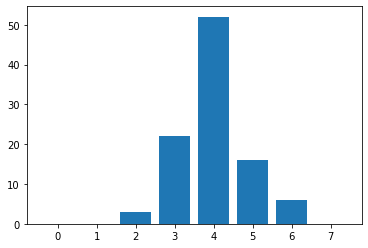

In [46]:
d = []
x = range(max(speed))
for i in x:
    d.append(speed.count(i))
    
plt.bar(x, d)

In [ ]:
np.mean(speed)

In [10]:
def benchmark(**kwargs):
    word_size = 5
    test_size = 100
    words = [i.lower() for i in word_list if len(i)==word_size]
    test_set = np.random.choice(words, test_size)
    
    speed = []
    for true_word in test_set:
        w = Wordle(true_word)
        s = Solver()
        try:
            r = s.solve(w, verbose=False, **kwargs)
        except:
            print(true_word)
        assert r == true_word
        speed.append(s.tries)
    d = []
    x = range(max(speed))
    for i in x:
        d.append(speed.count(i))

    plt.bar(x, d)
    
    return np.mean(speed)

4.59

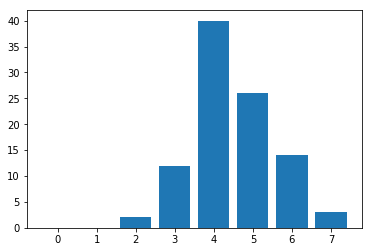

In [11]:
benchmark(random= True)

4.86

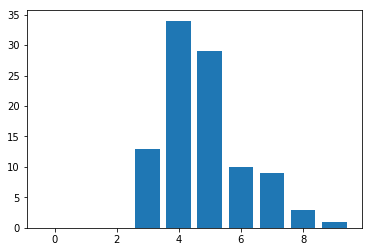

In [12]:
benchmark(random= False)

In [3]:
s = Solver(word_list)
s.ask()

/home/disc/p.templier/Documents/Doctorat/Dev/Solvers/Wordle/wordle_core.py:113: RuntimeWarning: invalid value encountered in true_divide
  self.probas = count / (np.sum(count)/5)


AssertionError: 

In [8]:
s.tell("sooty", [0, 0, 0, 0, 1])
s.ask()

'payee'

In [9]:
s.tell("gorge", [0, 0, 0, 0, 0])
s.ask()

'lymph'

In [10]:
s.tell("lymph", [0, 2, 2, 2, 2])
s.ask()

'nymph'

In [225]:
s.words

[]

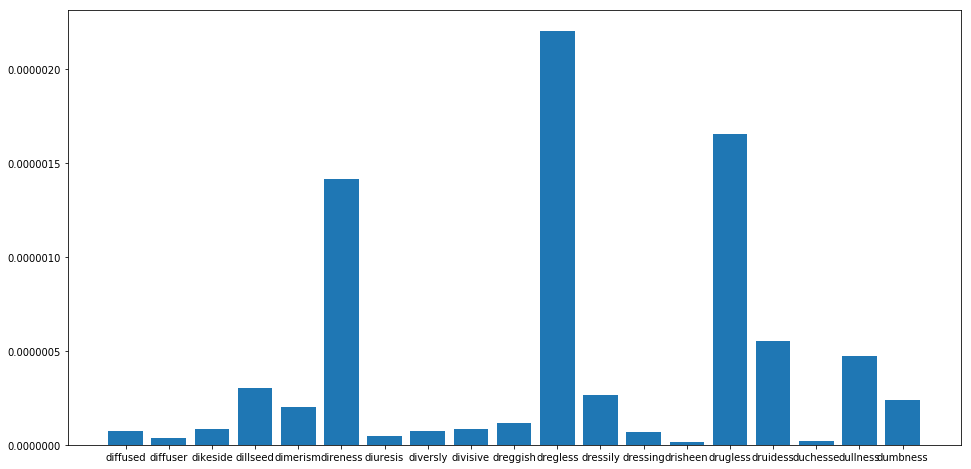

In [47]:
s.plot_words()